## CNN Model

### Imports 

In [41]:
# imports
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import normalize
from tensorflow.keras import  Model

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Setting a random seed for reproducibility
np.random.seed(42)

### Reading in image data

In [44]:
# read in image data here. try a target size of 512x512 (that was what preprocessed images in one of the kaggle datasets had)
# also normalize the data 

#function to import dataset
def read_images():
    
    #to store the diabetic image data
    diabetic_arrays = []
    diabetic_path = 'eye_diabetic/'

    #to iterate the diabetic dataset image by image
    for file in os.listdir(diabetic_path):
        try:
            #loading image and resizing it
            eye_diabetic = load_img(diabetic_path+file, target_size=(512, 512))
            #to convert image to array
            eye_diabetic_arr = img_to_array(eye_diabetic)/512
            #to normalize the array
            eye_diabetic_arr = normalize(eye_diabetic_arr)
            diabetic_arrays.append(eye_diabetic_arr)
            print(f"processing...{file}", end='\r')
        #error handling
        except:
            print(f'Error for file: {file}')
    print(f'{len(diabetic_arrays)} images converted - diabetic eye')  

    #to store the non-diabetic image data
    not_diabetic_arrays = []
    not_diabetic_path = 'eye_normal/'

    #to iterate the non-diabetic dataset image by image
    for file in os.listdir(not_diabetic_path):
        try:
            #loading image and resizing it
            eye_not_diabetic = load_img(not_diabetic_path+file, target_size=(512, 512))
            #to convert image to array
            eye_not_diabetic_arr = img_to_array(eye_not_diabetic)/512
            #to normalize the array
            eye_not_diabetic_arr = normalize(eye_not_diabetic_arr)
            not_diabetic_arrays.append(eye_not_diabetic_arr)
            print(f"processing...{file}", end='\r')
        #error handling
        except:
            print(f'Error for file: {file}')
    print(f'{len(not_diabetic_arrays)} images converted - non diabetic eye') 
    
    #returning the combined dataset
    return diabetic_arrays + not_diabetic_arrays

### Setting X and y

In [9]:
# set X and y here

# X will be the array of images
# y will be the target. If y is multiclass instead of binary, use y = to_categorical(y) to one-hot-encode y in keras

# images should already be scaled (normalized) so we don't need to use StandardScaler

X = read_images()
X = np.array(X)
print(f'X shape: {X.shape}')

y = [1] * 1000 + [0] * 1000
y = np.array(y)
print(f'y shape: {y.shape}')

1000 images converted - diabetic eye
1000 images converted - non diabetic eye
X shape: (2000, 512, 512, 3)
y shape: (2000,)


### Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Building the CNN Model

In [11]:
# Instantiate a Sequential model (that will process each layer sequentially)
model = Sequential()

In [12]:
# add a Convolutional 2D layer that will create 16 3x3 filters to detect image features

# starting with a small number of features and increasing them for each layer is recommended because
# the model finds the smaller number of main features first and then builds them up into more complex larger numbers of features

# the input shape is 512x512 pixels with 3 channels (RGB)
# one of the kaggle datasets with preprocessed images had processed them to a 512x512 size

# using relu (rectified linear function) activation, which returns positive output directly and returns 0 for negative output

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(512,512,3)))

In [13]:
# add a MaxPooling 2D layer that will take the maximum value in every 2x2 grid (with a stride defaulting to the pool_size)
# this effectively cuts the dimensions of the data in half, and helps get rid of noise caused by small variations in the image

model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
# add more convolutional layers (with max pooling between each one) 

# increasing filters to 32
# input shape is only needed for the first layer above
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# increasing filters to 64
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

In [15]:
# add a flatten layer to bridge between the convolutional layers and the dense layers
model.add(Flatten())

In [16]:
# the dense layer analyzes the features that were identified in the convolutional layers 
model.add(Dense(256, activation='relu'))

In [17]:
# add the output layer
# if thre are multiple classes (not binary), change the nodes to the number of classes and use softmax activation
model.add(Dense(1, activation='sigmoid'))

In [18]:
# compile the model
# if multiclass, use categorical_crossentropy instead 
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [19]:
# fit the model and save it as h so the accuracy and loss scores for each epoch can be visualized
# batch size is the number of images processed before updating the metrics
# epochs is the number of times the model goes through the entire dataset
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=64, epochs=10)

Epoch 1/10
24/24 [==============================] - 237s 9s/step - loss: 2.6925 - accuracy: 0.4880 - val_loss: 0.6869 - val_accuracy: 0.5540
Epoch 2/10
24/24 [==============================] - 239s 10s/step - loss: 0.6832 - accuracy: 0.5487 - val_loss: 0.6952 - val_accuracy: 0.5160
Epoch 3/10
24/24 [==============================] - 248s 10s/step - loss: 0.6642 - accuracy: 0.5873 - val_loss: 0.6826 - val_accuracy: 0.5560
Epoch 4/10
24/24 [==============================] - 244s 10s/step - loss: 0.6236 - accuracy: 0.6607 - val_loss: 0.6866 - val_accuracy: 0.5440
Epoch 5/10
24/24 [==============================] - 228s 10s/step - loss: 0.5707 - accuracy: 0.7220 - val_loss: 0.7772 - val_accuracy: 0.5060
Epoch 6/10
24/24 [==============================] - 226s 9s/step - loss: 0.4880 - accuracy: 0.7640 - val_loss: 0.7878 - val_accuracy: 0.5040
Epoch 7/10
24/24 [==============================] - 246s 10s/step - loss: 0.3996 - accuracy: 0.8247 - val_loss: 0.8659 - val_accuracy: 0.5200
Epoch 8/

### Visualizing the accuracy and loss scores for each epoch

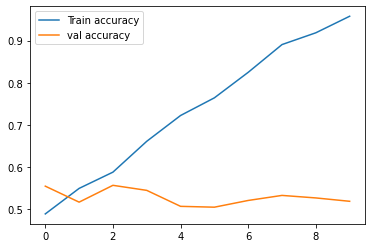

In [22]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend();

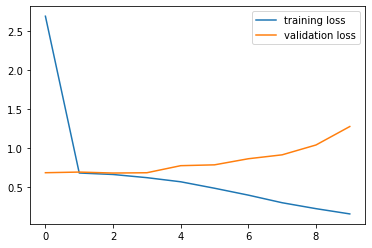

In [23]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend();

### Feature Maps

In [24]:
# we don't need to do this but I found a blog about how to write code to see the feature maps generated by the model--
# https://www.analyticsvidhya.com/blog/2020/11/tutorial-how-to-visualize-feature-maps-directly-from-cnn-layers/

# if we have time it would be cool to try this
layer_names = [layer.name for layer in model.layers]
layer_outputs = [layer.output for layer in model.layers]

In [25]:
feature_mapper = Model(model.input, layer_outputs)

In [27]:
diabetic_path = 'eye_normal/1000_left.jpeg'
img = load_img(diabetic_path, target_size=(512, 512))
sample = img_to_array(img)
sample = normalize(sample)
sample = np.expand_dims(sample, axis=0)
sample.shape

(1, 512, 512, 3)

In [36]:
preds = model.predict(X_test)
preds = pd.DataFrame(preds)


In [37]:
preds.head(10)

,0
0,0.939954
1,0.285255
2,0.000415
3,0.756168
4,0.391458
5,0.766729
6,0.957930
7,0.685907
8,0.640751
9,0.773605


In [43]:
r2_score(y_test, preds)

-0.43489323429363647

In [46]:
import warnings
warnings.filterwarnings('ignore')

MemoryError: Unable to allocate 106. PiB for an array with shape (3782742016, 3936256) and data type float64

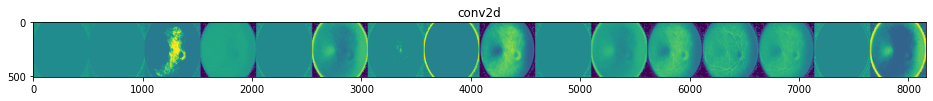

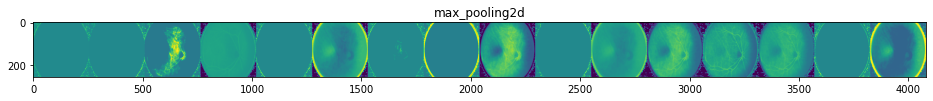

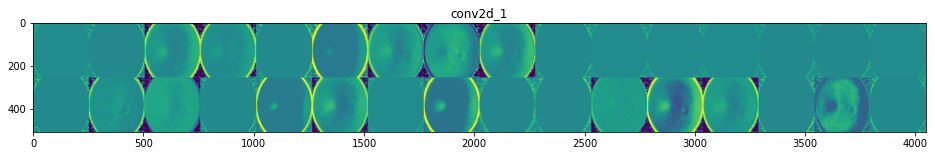

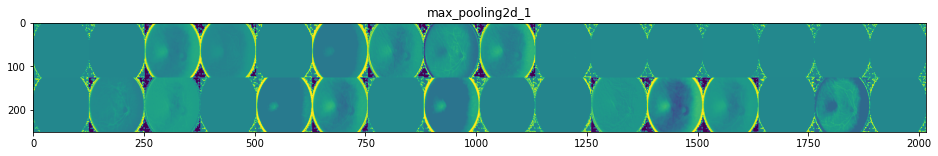

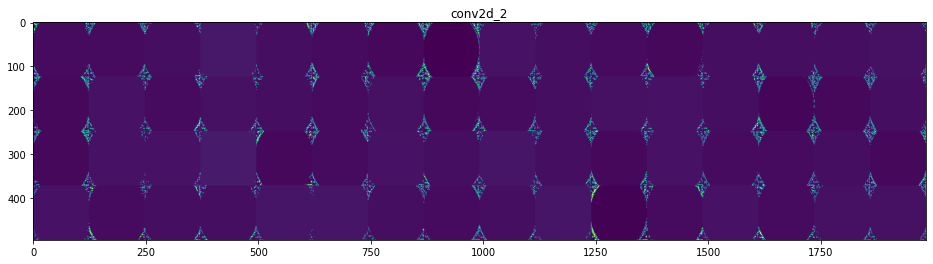

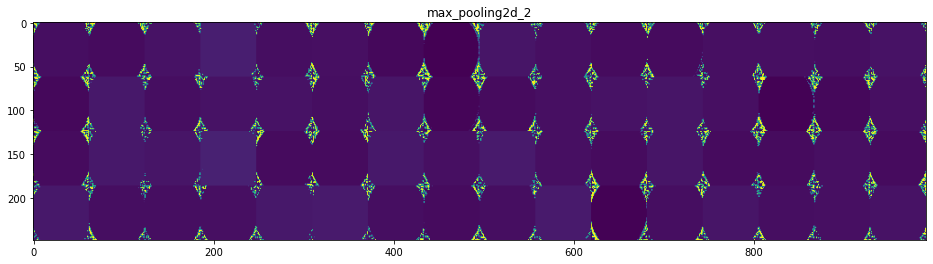

In [47]:
#no.of images to be displayed at each row
images_per_row = 16

#to iterate through the layers and features in parallel
for layer_name, feature_map in zip(layer_names, feature_maps ):
    #no.of features
    n_features = feature_map.shape[-1]
    #no.of rows
    size = feature_map.shape[1] 
    n_cols = n_features // images_per_row 
    #to store the data to be visualized
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    # Tiles each filter into the horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            feature_image = feature_map[0,:, :, col * images_per_row + row]
            #to processes the features
            feature_image -= feature_image.mean()
            feature_image /= feature_image.std()
            feature_image *= 64
            feature_image += 128
            feature_image = np.clip(feature_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = feature_image
    #making visualization for each layer
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')